# EDA
 - before covid and lockdown

In [2]:
def to_date(datas):
    for data in datas:
        data.created_at = data.created_at.dt.strftime('%Y-%m-%d')
        data.created_at = pd.to_datetime(data.created_at)

In [3]:
def glance(datas):
    for data in datas :
  
        names =[x for x in globals() if globals()[x] is data]
        name = names[0]
        if len(names) > 3:
            name = names[1]

    
        print("++++++++++++++++++shape of the  {} data:+++++++++++++++++++++ ".format(name))
        print(data.shape)
        print("\n unique no of each variable\n")
        print(data.nunique())
        print("\n--------data summery------------\n")
        print(data.info())
        data.sample(10)    


In [4]:
def univariate(datas):
    for data in datas:
        names =[x for x in globals() if globals()[x] is data]
        name = names[0]
        if len(names) > 3:
            name = names[1]
        print("++++++++++++++++++{} data:+++++++++++++++++++++ ".format(name))

        cat_col = data.select_dtypes(exclude=['int64', 'float64']).columns #catagorical columns
        non_cat_col = data.select_dtypes(include=['int64', 'float64']).columns # non catagorical variable
        for  var in non_cat_col:
            g = sns.FacetGrid(data)
            g.map(sns.distplot, var,hist=True,kde=False)
        plt.show()
        print(cat_col)

In [5]:
def at_whole_time(datas):
    for data in datas:
        names =[x for x in globals() if globals()[x] is data]
        name = names[0]
        if len(names) > 3:
            name = names[1]
        print("++++++++++++++++++{} data:+++++++++++++++++++++ ".format(name))
    #     data.index = pd.to_datetime(data['created_at'].loc[3],format='%y-%m-%d %H:%M:%S')
        data.groupby(data.created_at).sum().plot()
        time.sleep(20)
        plt.show()

In [6]:
# pd.concat([after_covid_kenya,before_covid_kenya]).groupby("created_at").sum().plot()

In [7]:
def covid_analysis(data_before_covid,data_after_covid):
    data_before_covid =data_before_covid.groupby(data_before_covid.created_at).sum()
    data_after_covid =data_after_covid.groupby(data_after_covid.created_at).sum()

    sns.lineplot( x = data_before_covid.index , y = data_before_covid.id)
    sns.lineplot( x = data_after_covid.index , y = data_after_covid.id)


    plt.ylabel("count tweet")
    plt.legend(["before covid","after covid"])

In [8]:
def lockdown_analysis(data_before_ld,data_during_ld,data_after_ld,):
    data_before_ld =data_before_ld.groupby(data_before_ld.created_at).sum()
    data_after_ld=data_after_ld.groupby(data_after_ld.created_at).sum()
    data_during_ld=data_during_ld.groupby(data_during_ld.created_at).sum()

    sns.lineplot( x = data_before_ld.index , y = data_before_ld.id)
    sns.lineplot( x = data_during_ld.index , y = data_during_ld.id)
    sns.lineplot( x = data_after_ld.index , y = data_after_ld.id)


    plt.ylabel("count tweet")
    plt.legend(["before lock down","during lock down","after lock down"])

In [9]:

def lockdown_period(data_before_ld,data_during_ld,data_after_ld):
    data_before_ld =data_before_ld.groupby(data_before_ld.created_at.dt.month).sum()
    data_after_ld=data_after_ld.groupby(data_after_ld.created_at.dt.month).sum()
    data_during_ld=data_during_ld.groupby(data_during_ld.created_at.dt.month).sum()

    sns.lineplot( x = data_before_ld.index , y = data_before_ld.id)
    sns.lineplot( x = data_during_ld.index , y = data_during_ld.id)
    sns.lineplot( x = data_after_ld.index , y = data_after_ld.id)


    plt.ylabel("count tweet")
    plt.legend(["before lock down","during lock down","after lock down"])

In [10]:
def favorite_count(before_covid,after_covid):
    sns.lineplot(x = before_covid["created_at"] , y = before_covid.favorite_count)
    sns.lineplot(x = after_covid["created_at"] , y = after_covid.favorite_count )
    # sns.scatterplot(x = before_covid_kenya["created_at"] , y = before_covid_kenya.groupby(data.created_at.dt.day).retweet_count.sum())

    plt.ylabel("count favorite")
    plt.legend(["before covid","after covid"])

In [11]:
def retweet_count(before_covid,after_covid):
    sns.lineplot(x = before_covid["created_at"] , y = before_covid.retweet_count)
    sns.lineplot(x = after_covid["created_at"] , y = after_covid.retweet_count )
    # sns.scatterplot(x = before_covid_kenya["created_at"] , y = before_covid_kenya.groupby(data.created_at.dt.day).retweet_count.sum())

    plt.ylabel("count retweet")
    plt.legend(["before covid","after covid"])

In [84]:
def count_plot(datas):
    all_tweet = {}
    for data in datas:
        names =[x for x in globals() if globals()[x] is data]
        name = names[0]
        if len(names) > 3:
             name = names[1]
        all_tweet.update( {name : len(data)} )
    all_tweets = pd.DataFrame.from_dict(all_tweet, orient='index',columns=[ 'value' ])
    all_tweets = all_tweets.sort_values('value',ascending=False).reset_index()
    plt.figure(figsize=(10,8))
    ax = sns.barplot(x="index", y="value", hue="index", data=all_tweets)

    ax.set(xlabel="period", ylabel='Count')
    for i, v in enumerate(all_tweets["value"].iteritems()):        
        ax.text(i ,v[1], "{:,}".format(v[1]), color='m', rotation=30)


    

## Kenya

In [13]:
after_covid_kenya = pd.read_csv("after_covid_kenya.csv",parse_dates=['created_at'])
after_ld_kenya = pd.read_csv("after_ld_kenya.csv",parse_dates=['created_at'])
before_covid_kenya = pd.read_csv("before_covid_kenya.csv",parse_dates=['created_at'])
before_ld_kenya = pd.read_csv("before_ld_kenya.csv",parse_dates=['created_at'])
during_ld_kenya = pd.read_csv("during_ld_kenya.csv",parse_dates=['created_at'])

In [14]:
from matplotlib  import rcParams

%matplotlib inline
rcParams["figure.figsize"] = 16,6
c = '#386B7F'

In [15]:
datas = [before_covid_kenya,after_covid_kenya,before_ld_kenya,during_ld_kenya,after_ld_kenya]


In [16]:
to_date(datas)

In [17]:
glance(datas)

++++++++++++++++++shape of the  before_covid_kenya data:+++++++++++++++++++++ 
(602, 7)

 unique no of each variable

Unnamed: 0        545
id                602
created_at         72
screen_name        76
retweet_count     102
favorite_count     32
text              528
dtype: int64

--------data summery------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      602 non-null    int64         
 1   id              602 non-null    int64         
 2   created_at      602 non-null    datetime64[ns]
 3   screen_name     602 non-null    object        
 4   retweet_count   602 non-null    int64         
 5   favorite_count  602 non-null    int64         
 6   text            602 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 33.0+ KB
None
++++++++++++++++++shape of the  a

### Univariate Analysis

++++++++++++++++++before_covid_kenya data:+++++++++++++++++++++ 


/workspace/.conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


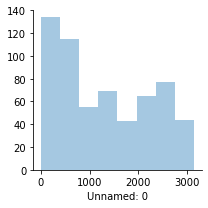

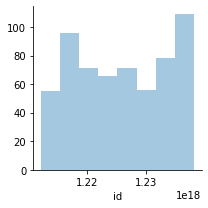

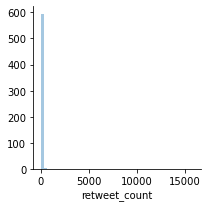

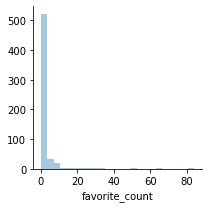

Index(['created_at', 'screen_name', 'text'], dtype='object')
++++++++++++++++++after_covid_kenya data:+++++++++++++++++++++ 


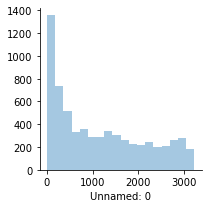

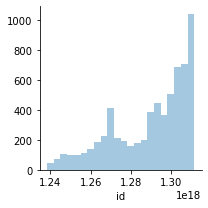

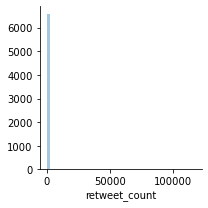

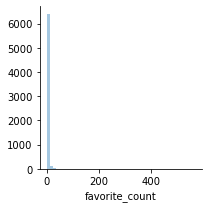

Index(['created_at', 'screen_name', 'text'], dtype='object')
++++++++++++++++++before_ld_kenya data:+++++++++++++++++++++ 


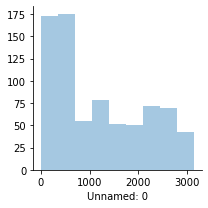

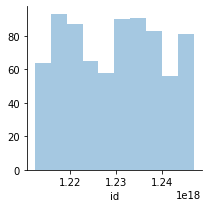

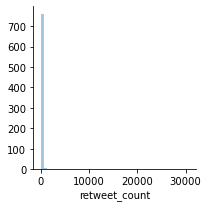

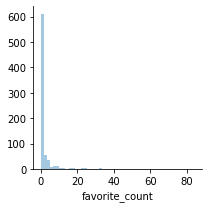

Index(['created_at', 'screen_name', 'text'], dtype='object')
++++++++++++++++++during_ld_kenya data:+++++++++++++++++++++ 


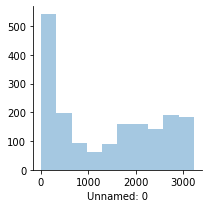

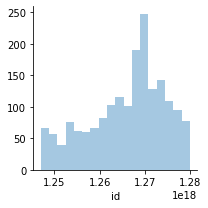

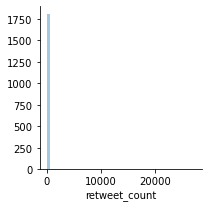

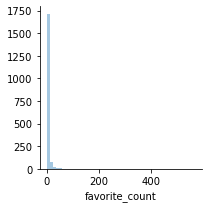

Index(['created_at', 'screen_name', 'text'], dtype='object')
++++++++++++++++++after_ld_kenya data:+++++++++++++++++++++ 


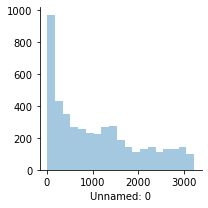

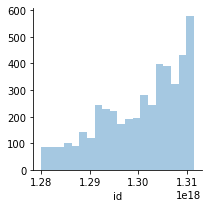

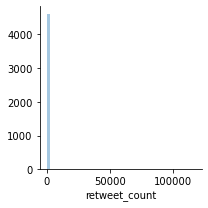

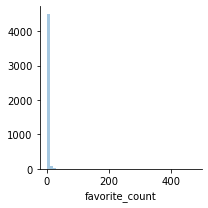

Index(['created_at', 'screen_name', 'text'], dtype='object')


In [18]:
univariate(datas)

### Seasonal Analysis

++++++++++++++++++before_covid_kenya data:+++++++++++++++++++++ 


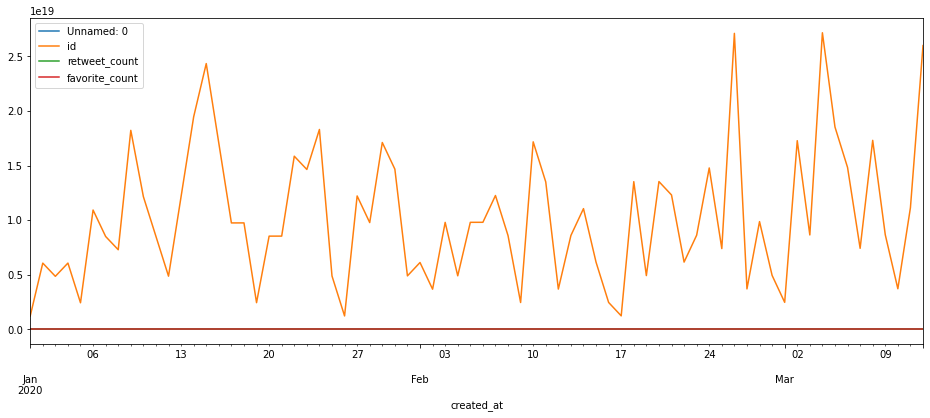

++++++++++++++++++after_covid_kenya data:+++++++++++++++++++++ 


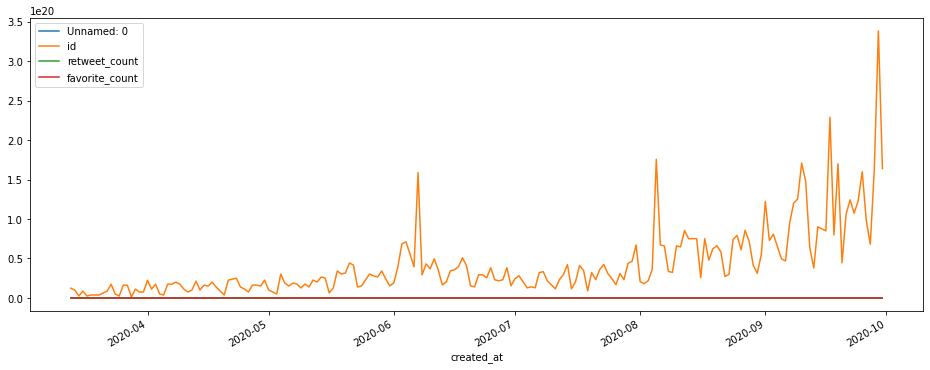

++++++++++++++++++before_ld_kenya data:+++++++++++++++++++++ 


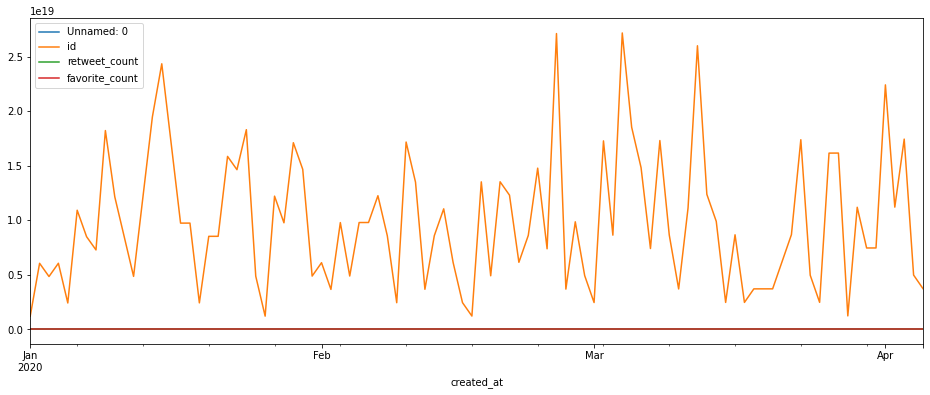

++++++++++++++++++during_ld_kenya data:+++++++++++++++++++++ 


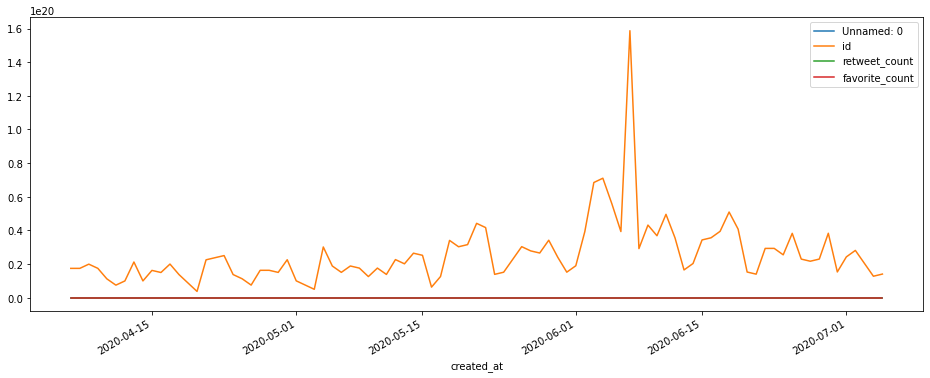

++++++++++++++++++after_ld_kenya data:+++++++++++++++++++++ 


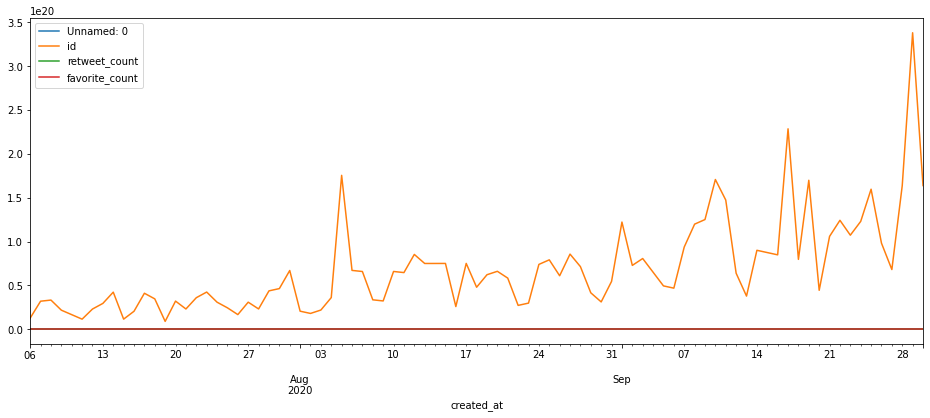

In [19]:
at_whole_time(datas)

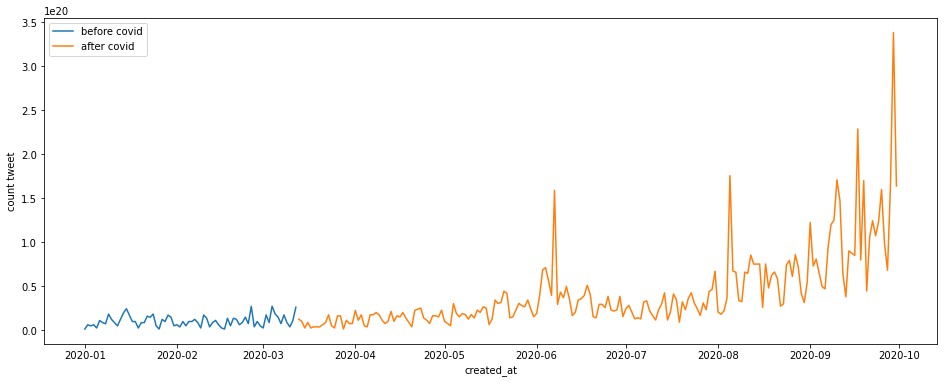

In [20]:
covid_analysis(before_covid_kenya,after_covid_kenya)

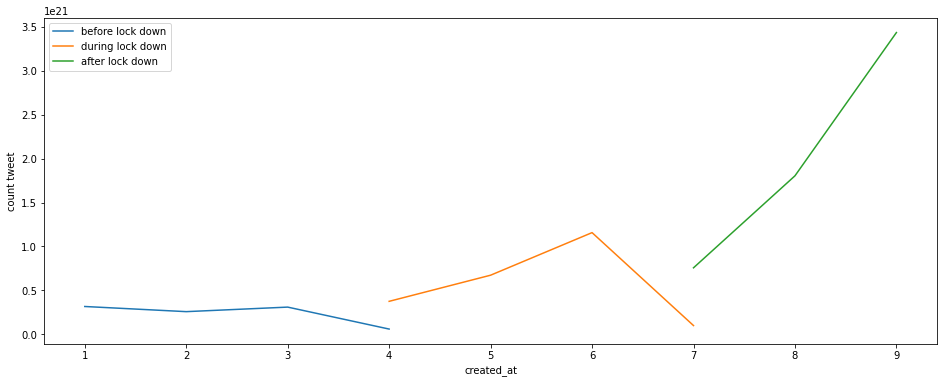

In [21]:
lockdown_period(before_ld_kenya,during_ld_kenya,after_ld_kenya)

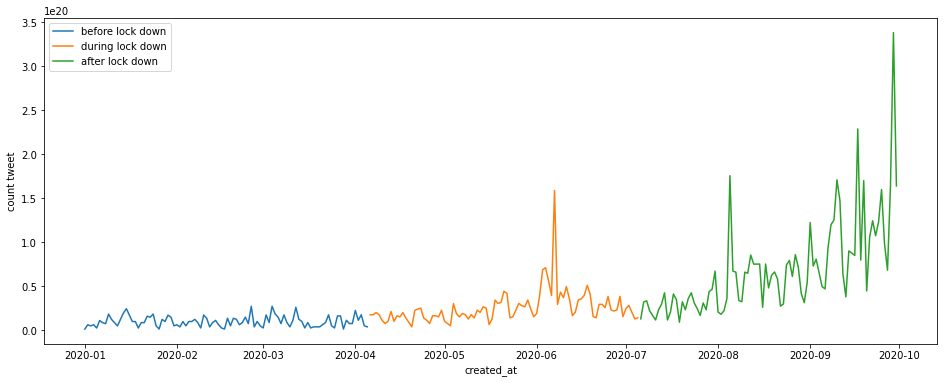

In [22]:
lockdown_analysis(before_ld_kenya,during_ld_kenya,after_ld_kenya)

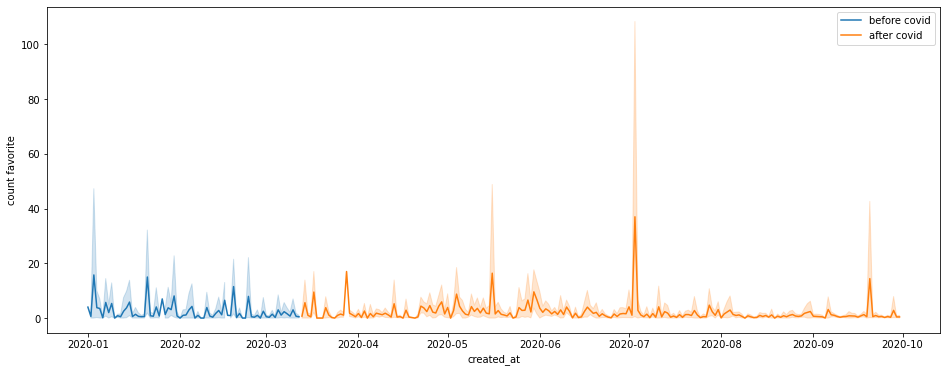

In [23]:
favorite_count(before_covid_kenya,after_covid_kenya)


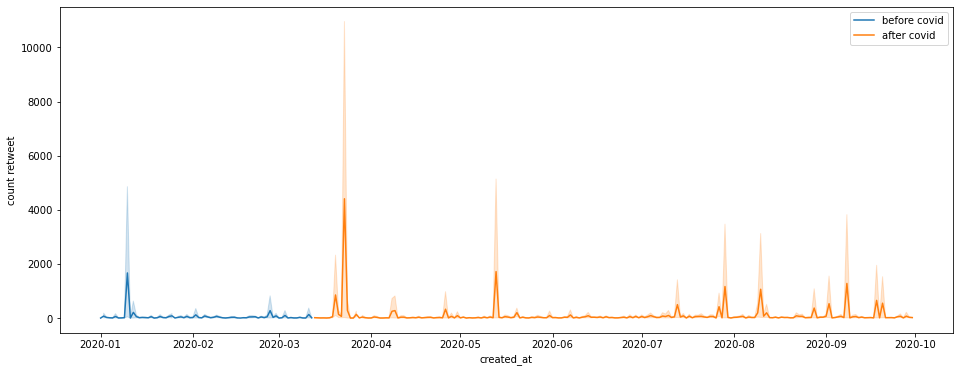

In [24]:
retweet_count(before_covid_kenya,after_covid_kenya)


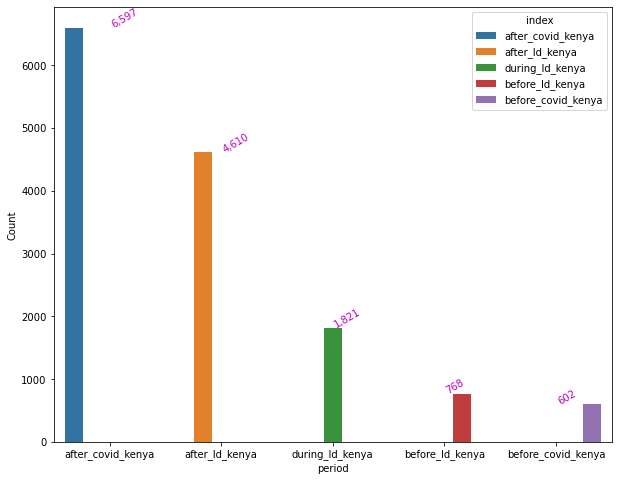

In [85]:

count_plot(datas)